<a href="https://colab.research.google.com/github/dsjes/titanic-analysis/blob/main/%E5%B0%88%E6%A1%88%E5%AF%A6%E4%BD%9C_01_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

專案實作#01:鐵達尼號存活預測

環境準備

In [ ]:
#匯入所需要的套件
import pandas as pd
import numpy as np

In [ ]:
#匯入資料
url = "https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv"
df_train = pd.read_csv(url)

In [ ]:
#先觀察前五筆資料
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#列印出資料中所有欄位
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

definition of each column:

1.Survived: 1 means survived; 0 means not survived

2.Pclass: ticket class。
1 means upper class; 2 means middle class; 3 means lower class

3.Name: passenger's name

4.Sex: passenger's sex

5.Age: passenger's age

6.Parch: of parents / children aboard the Titanic

7.Sibsp: of siblings / spouses aboard the Titanic

8.Fare: passenger fare

9.Cabin: cabin number

10.Embarked: port of embarkation。
C means Cherbourg; Q means Queenstown; S means Southampton

11.Ticket: ticket number

In [ ]:
#匯入視覺化套件
import seaborn as sns
import matplotlib.pyplot as plt

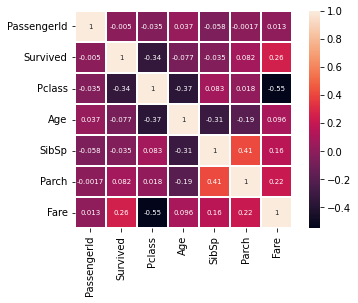

In [ ]:
#觀察變數間的線性關係
corr = df_train.corr()
sns.heatmap(corr, annot = True, linecolor = "white",square = True, annot_kws = {'size':7} , linewidths = 1)

由上圖可知Pclass與Survived有最大的負相關性，Fare與Survived有最大的正相關性

In [ ]:
abs(corr["Survived"]).sort_values(ascending = False)

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64

**Note 1**

sns.heatmap(data, vmin = None, vmax = None, center = None, annot = True, fmt = ".2g", linewidths = 0, linecolor = "white", cbar = True, square = False, xticklabels = "auto", yticklabels = "auto"  )

vmin、vmax:設定顏色範圍

cmap:設定顏色

center:設定中心點

annot:添加註釋

fmt:註釋使用格式

linewidths:線條寬度

linecolor:線條顏色

cbar:顏色條

square:圖形為正方形

xticklabel、yticklaber:設定x、y軸刻度

In [ ]:
#印出df_train的資訊，可以知道各欄位的屬性與是否有遺失值
print(df_train.info())
print(df_train.isnull().any())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked

In [ ]:
#發現Cabin內的遺失值太多，因此直接刪掉
df_train = df_train.drop(["Cabin"],axis = 1)

由info可知Age、Cabin、Embarked有遺失值，其中為object的欄位有Name、Sex、Ticket、Cabin、Embarked

In [ ]:
#觀察df_train中是object的資料分別有什麼數據，其中Sex、Embarked的分類較少
for i in df_train.select_dtypes("object"):
  print(df_train[i].value_counts())
  print("------------")

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
------------
male      577
female    314
Name: Sex, dtype: int64
------------
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
------------
S    644
C    168
Q     77
Name: Embarked, dtype: int64
------------


In [ ]:
df_train1 = df_train.copy()
df_train1["Age"] = df_train1["Age"].fillna(0,inplace = True)
df_train1["Embarked"] = df_train1["Embarked"].fillna(0,inplace = True)

In [ ]:
#由於Name、Ticket轉成dummy varaible會增加太多欄位，因此先刪除，之後再利用特徵工程分析這兩個欄位是否會影響目標
df_train1 = df_train1.drop(["Name","Ticket"],axis = 1)
df_train1 = pd.get_dummies(df_train1)
df_train1

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male
0,1,0,3,1,0,7.2500,0,1
1,2,1,1,1,0,71.2833,1,0
2,3,1,3,0,0,7.9250,1,0
3,4,1,1,1,0,53.1000,1,0
4,5,0,3,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000,0,1
887,888,1,1,0,0,30.0000,1,0
888,889,0,3,1,2,23.4500,1,0
889,890,1,1,0,0,30.0000,0,1


In [ ]:
#再次檢查是否有遺失值
df_train1.isnull().any()

PassengerId    False
Survived       False
Pclass         False
SibSp          False
Parch          False
Fare           False
Sex_female     False
Sex_male       False
dtype: bool

In [ ]:

columns_X = set(df_train1.columns) - {'Survived'}
columns_y = ['Survived']

train_X = df_train1[columns_X]
train_y = df_train1[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores1 = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
scores1

array([0.81005587, 0.80337079, 0.78089888, 0.76966292, 0.80898876])

確保資料可丟入模型運作後，再進行特徵工程。
首先利用 **Mutual Information** 挑選出與目標有較大關係的幾個變數。(使用Mutual Information而不使用correlation的原因為，前者可以適用在線性與非線性的關係中，後者僅適用在線性關係。

Two Mutual Information metrics:

1.for real-valued targets:
mutual_info_regression

2.for categorical targets:
mutual_info_classif

In [ ]:
#由於目標為是否生存，因此引入mutual_info_classif套件
from sklearn.feature_selection import mutual_info_classif
X = df_train1.copy()
y = X.pop("Survived")
def make_mi_scores(X,y,discrete_features):
  mi_scores = mutual_info_classif(X,y,discrete_features = "auto")
  mi_scores = pd.Series(mi_scores, name = "MI score" ,index = X.columns)
  mi_scores = mi_scores.sort_values(ascending = False)
  return mi_scores
mi_scores = make_mi_scores(X,y,discrete_features = "auto")
mi_scores.sort_values(ascending = False)

Sex_female     0.173933
Sex_male       0.137666
Fare           0.131796
Pclass         0.069334
SibSp          0.039203
Parch          0.018517
PassengerId    0.017484
Name: MI score, dtype: float64

**1. 延續昨天的觀察，欄位中與「是否生存欄位」找出關係比較大的欄位有哪些？你是如何定義「關係大」的呢？**



由上方的mi_scores可知，Sex_female、Sex_male、Fare、Pclass、Parch等變數的MI分數較高，可能是與目標(是否生存)有較大的關係。

但使用MI有個缺點，MI無法反映變數間的交互作用，可能A變數與B變數可以更好地解釋目標，這就仰賴對分析領域的 domain knowledge。

**2. 請問資料中有哪些「欄位」你覺得是多餘的，在分析過程中應該被排除的呢？為什麼？**

由於Cabin中遺失值超過原資料的20%，因此可以刪除，至於Name、Ticket、PassengerId是否可以保留仍要看這三者與其他變數是否有交互作用，但若這三者與其他變數有線性關係，為避免共線性問題也須刪除。

**3.** **請你針對「有缺失值」的幾個欄位，嘗試比較不同的處理策略（例如用常數、中位數、平均數填補）。** 

有缺失值的欄位有 Age、Cabin、Embarked，但因為Cabin遺失值的比例超過20%，因此先刪除，以免影響分析。Age填入平均數，Embarked填入眾數，可得出以下的scores1。

改用Age的平均數填入Age欄位的遺失值，並用Embarked中的"S"填入遺失值，得出scores2，scores1與scores2相同，不太合理，可能是某地方出了問題

In [ ]:
df_train2 = df_train.copy()
df_train2["Age"] = df_train2["Age"].fillna(df_train2["Age"].mean(),inplace = True)
df_train2["Embarked"] = df_train2["Embarked"].fillna("S",inplace = True)

df_train2 = df_train2.drop(["Name","Ticket"],axis = 1)
df_train2 = pd.get_dummies(df_train2)

columns_X = set(df_train2.columns) - {'Survived'}
columns_y = ['Survived']

train_X2 = df_train2[columns_X]
train_y2 = df_train2[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log2 = LogisticRegression()
scores2 = cross_val_score(log2, train_X2, train_y2.values.ravel(),cv=5,scoring='accuracy')


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print("Age欄位、Embarked欄位分別用0填入遺失值，scores1:",scores1)
print("Age欄位用平均數填入遺失值、Embarked欄位分別用S填入遺失值，scores2:",scores2)
scores1 == scores2

Age欄位、Embarked欄位分別用0填入遺失值，scores1: [0.81005587 0.80337079 0.78089888 0.76966292 0.80898876]
Age欄位用平均數填入遺失值、Embarked欄位分別用S填入遺失值，scores2: [0.81005587 0.80337079 0.78651685 0.76966292 0.80898876]


array([ True,  True, False,  True,  True])

**4. 請你針對「非數值型」的幾個欄位，嘗試比較不同的處理策略（例如用 LabelEncoder 或 OneHotEncoder）。**

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_train3 = df_train.copy()
df_train3 = df_train3.drop(["Name","Ticket"],axis = 1)
df_train3["Age"] = df_train3["Age"].fillna(df_train3["Age"].mean(),inplace = True)
df_train3["Embarked"] = df_train3["Embarked"].fillna("S",inplace = True)
df_train3["Embarked"] = labelencoder.fit_transform(df_train3['Embarked'])
df_train3 = pd.get_dummies(df_train3)
df_train3

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,1,0,7.2500,0,0,1
1,2,1,1,1,0,71.2833,0,1,0
2,3,1,3,0,0,7.9250,0,1,0
3,4,1,1,1,0,53.1000,0,1,0
4,5,0,3,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000,0,0,1
887,888,1,1,0,0,30.0000,0,1,0
888,889,0,3,1,2,23.4500,0,1,0
889,890,1,1,0,0,30.0000,0,0,1


In [ ]:
columns_X = set(df_train3.columns) - {'Survived'}
columns_y = ['Survived']

train_X3 = df_train3[columns_X]
train_y3 = df_train3[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log3 = LogisticRegression()
scores3 = cross_val_score(log3, train_X3, train_y3.values.ravel(),cv=5,scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print("Age欄位、Embarked欄位分別用0填入遺失值，scores1:",scores1)
print("Age欄位用平均數填入遺失值、Embarked欄位分別用S填入遺失值，scores2:",scores2)
print("Embarked使用label encoder後的scores3:",scores3)


Age欄位、Embarked欄位分別用0填入遺失值，scores1: [0.81005587 0.80337079 0.78089888 0.76966292 0.80898876]
Age欄位用平均數填入遺失值、Embarked欄位分別用S填入遺失值，scores2: [0.81005587 0.80337079 0.78651685 0.76966292 0.80898876]
Embarked使用label encoder後的scores3: [0.81005587 0.80337079 0.78651685 0.76966292 0.80898876]


**5. 請你嘗試不同的特徵工程手法，產生可以幫助分析結果的新變數。**

接下來進行特徵工程，Name、Ticket可以透過拆解來產生新變數

In [ ]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv"
df_train = pd.read_csv(url)
df_train4 = df_train.copy()
df_train4["Name"].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

從Name欄位中可以發現，名字前有頭銜，頭銜可能代表社會地位，因此或許與生存率相關，可以提出分析，找出是否有關鍵因素

In [ ]:
title = pd.DataFrame()
#將title中的頭銜拆解出來
title["Title"] = df_train4["Name"].map(lambda name: name.split(",")[1].split(".")[0].strip())
#頭銜前面會多一個空格，因此需要用strip()
title                                      

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [ ]:
print(title["Title"].unique())
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Johnheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess": "Royalty",
    "Dona": "Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Lady": "Royalty"
    }
title["Title"] = title["Title"].map(Title_Dictionary)
title = pd.get_dummies(title["Title"])
title.head()

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [ ]:
df_train4["Cabin"].value_counts(ascending = False)

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

由上可以發現Cabin分成A、B、C、D、E等艙位，因此取出Cabin資料中第一個字母，遺失值用U替代，將船艙分類成Cabin_A、Cabin_B、Cabin_C等等

In [ ]:
cabin = pd.DataFrame()
#遺失值用U替代
cabin["Cabin"] = df_train4["Cabin"].fillna("U",inplace = True)
cabin["Cabin"] = df_train4["Cabin"].map(lambda a:a[0])
cabin = pd.get_dummies(cabin,prefix = "Cabin_")
cabin

,Cabin__A,Cabin__B,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T,Cabin__U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,1
887,0,1,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,1
889,0,0,1,0,0,0,0,0,0


接下來處理Ticket欄位，發現Ticket中有些有英文，有些只有數字，因此先清除"."、"/"，並改成" "，寫一個function清理Ticket欄位

In [ ]:
ticket = df_train4["Ticket"]
ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

(法一:較早期的做法)

In [ ]:
def cleanticket(ticket):
  ticket = ticket.replace(".","")
  ticket = ticket.replace("/","")
  #split()預設是用空白來切分，例如將PC 17599切分成PC 17599
  ticket = ticket.split()
  #strip()將空白移除，例如將PC 17599切分成PC17599
  ticket = map(lambda t:t.strip(),ticket)
  #過濾那些是不是數字的資料
  ticket = list(filter(lambda t : not t.isdigit(),ticket))
  #如果ticket中的元素長度大於0，則回傳第一個字母，若長度等於0則回傳XXX
  if len(ticket) > 0:
    return ticket[0]
  else:
    return "XXX"

ticket = pd.DataFrame()
#因為cleanticket()輸入的資料型態是字串，所以要用map()對整個欄位做同樣的處理
ticket["Ticket"] = df_train4["Ticket"].map(cleanticket)
ticket = pd.get_dummies(ticket["Ticket"],prefix = "Ticket")
ticket

,Ticket_A4,Ticket_A5,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,...,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


(法二:利用Pandas)

In [ ]:
ticket1 = df_train4["Ticket"].str.replace(",","")
ticket2 = ticket1.str.replace("/","")
ticket3 = ticket2.str.strip()
ticket4 = ticket3.str.split()
ticket4
#此時已將英文與數字用逗號分開，格式為list

0             [A5, 21171]
1             [PC, 17599]
2      [STONO2., 3101282]
3                [113803]
4                [373450]
              ...        
886              [211536]
887              [112053]
888          [W.C., 6607]
889              [111369]
890              [370376]
Name: Ticket, Length: 891, dtype: object

In [ ]:
ticket5 = ticket4.map(lambda t : "XXX" if len(t) == 1 else t[0])
#當ticket4中有英文則長度會大於1，為了留下有英文的部分，當長度等於1時，回傳XXX，當長度大於1時，回傳最前方的英文
ticket5

0           A5
1           PC
2      STONO2.
3          XXX
4          XXX
        ...   
886        XXX
887        XXX
888       W.C.
889        XXX
890        XXX
Name: Ticket, Length: 891, dtype: object

In [ ]:
ticket5 = pd.get_dummies(ticket5)
ticket5

,A.5.,A4,A4.,A5,A5.,AS,C,C.A.,C.A.SOTON,CA,...,SOTONO2,SOTONOQ,STONO,STONO2.,SWPP,W.C.,W.E.P.,WC,WEP,XXX
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


由上述可知，法一與法二得到相同的結果

接下來分析Parch、SibSp欄位，Parch是父母與子女同船數目，SibSp是表堂兄弟姊妹同船之數目，將兩欄位相加可以計算親屬同船人數，並分類成Family_single、Family_small、Family_large

In [ ]:
df_train4["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
family = pd.DataFrame()
family["Familysize"] = df_train4["Parch"] + df_train4["SibSp"] +1
#因為要計算親屬同船人數，若沒有親屬一起同船，則屬於Family_single，還是有一人

分類方法如下，若family["Familysize"]等於1，則歸類到Family_single;若family["Familysize"]介於2到4之間，則歸類到Family_small;若family["Familysize"]大於4，則歸類到Family_large

In [ ]:
family["Family_single"] = family["Familysize"].map(lambda s : 1 if s == 1 else 0)
family["Family_small"] = family["Familysize"].map(lambda s : 1 if 2<=s<=4 else 0)
family["Family_large"] = family["Familysize"].map(lambda s : 1 if s>4 else 0)
family.head()

,Familysize,Family_single,Family_small,Family_large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [ ]:
df_train_new = pd.concat([df_train4,family,ticket,title,cabin],axis = 1)
df_train_new = df_train_new.drop(["Name","SibSp","Parch","Ticket","Cabin"],axis = 1)

In [ ]:
df_train_new.isnull().any()
df_train_new["Age"] = df_train_new["Age"].fillna(df_train_new["Age"].mean(),inplace = True)
df_train_new["Embarked"] = df_train_new["Embarked"].fillna("S",inplace = True)
df_train_new = pd.get_dummies(df_train_new)

In [ ]:
columns_X = set(df_train_new.columns) - {'Survived'}
columns_y = ['Survived']

train_Xnew = df_train_new[columns_X]
train_ynew = df_train_new[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_new = LogisticRegression()
scores_new = cross_val_score(log_new, train_Xnew, train_ynew.values.ravel(),cv=5,scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print("Age欄位、Embarked欄位分別用0填入遺失值，scores1:",scores1)
print("Age欄位用平均數填入遺失值、Embarked欄位分別用S填入遺失值，scores2:",scores2)
print("Embarked使用label encoder後的scores3:",scores3)
print('經過特徵工程轉換後的資料，得到的scores_new為:{}'.format(scores_new))

Age欄位、Embarked欄位分別用0填入遺失值，scores1: [0.81005587 0.80337079 0.78089888 0.76966292 0.80898876]
Age欄位用平均數填入遺失值、Embarked欄位分別用S填入遺失值，scores2: [0.81005587 0.80337079 0.78651685 0.76966292 0.80898876]
Embarked使用label encoder後的scores3: [0.81005587 0.80337079 0.78651685 0.76966292 0.80898876]
經過特徵工程轉換後的資料，得到的scores_new為:[0.81564246 0.80898876 0.81460674 0.82022472 0.84831461]


由scores_new可知，進行特徵工程後，資料的分數的確上升

## **Day 10 HW1**

1. 在分類模型中我們可以利用「Recall」和「Precision」進行模型評估，請問這兩種方法有什麼差別？

recall = TP/(TP+FN)，在所有預測正確的樣本中是預測正向的比例

precision = TP/(TP+FP)，在所有是預測正向的樣本中，實際是正向的比例

當目的不同，使用的評估標準便不同，例如當系統自動判斷是否為垃圾郵件時，會採用 precision，
因爲不希望遺漏重要郵件，當醫療器材檢驗病人是否得病時，會使用 recall，希望精准度可以高一點。
但好的模型兩者都要高。
2. 在回歸模型中我們可以利用「MSE」和「MAE」進行模型評估，請問這兩種方法有什麼差別？

MSE是誤差的平方和

MAE是誤差絕對直的和

選用方式：若離群值在商業模式中是重要的異常現象，則採用MSE，若不是則採用MAE
3. 請問模型評估的指標（例如 Recall、MSE）跟「交叉驗證（Cross-Validation）」之間有什麼關係？

Recall、MSE都是切一份資料出來看，可能取到 easy data ，而有較好的指標，但交叉驗證是將資料切成許多等份，每次選一等分的資料出來做驗證，可以排除資料偏差的情況

SyntaxError: ignored